# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("C:/Users/admin/Desktop/21BCE5746/Assignment 3/Mall_Customers.csv")

In [88]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing 

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
df.duplicated().sum()

0

In [93]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
map_dict = {
    'Male':0,
    'Female': 1
}

In [95]:
df['Gender'] = df['Gender'].map(map_dict)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [97]:
scaler.fit(df)

MinMaxScaler()

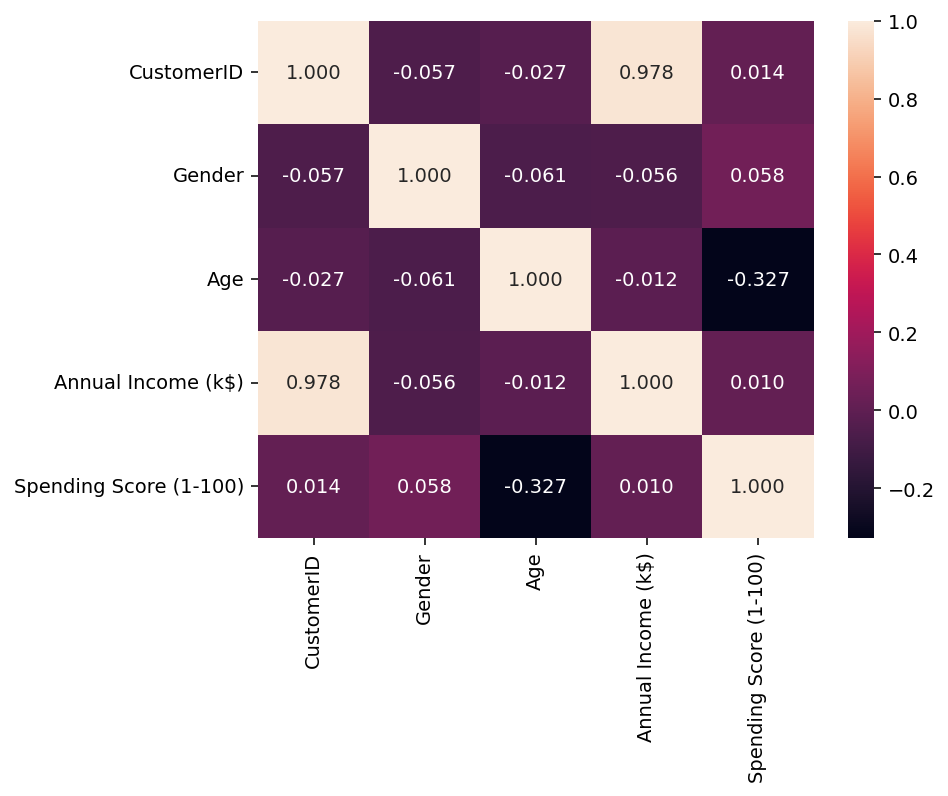

In [98]:
import seaborn as sns
#correlation
corr = df.corr()

plt.figure(dpi=140)
sns.heatmap(df.corr(), annot=True, fmt= '.3f')
plt.show()

In [99]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [100]:
X = df.iloc[:,:-1]

In [101]:
X

,CustomerID,Gender,Age,Annual Income (k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17
...,...,...,...,...
195,196,1,35,120
196,197,1,45,126
197,198,0,32,126
198,199,0,32,137


In [102]:
y = df.iloc[:,-1]

In [103]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


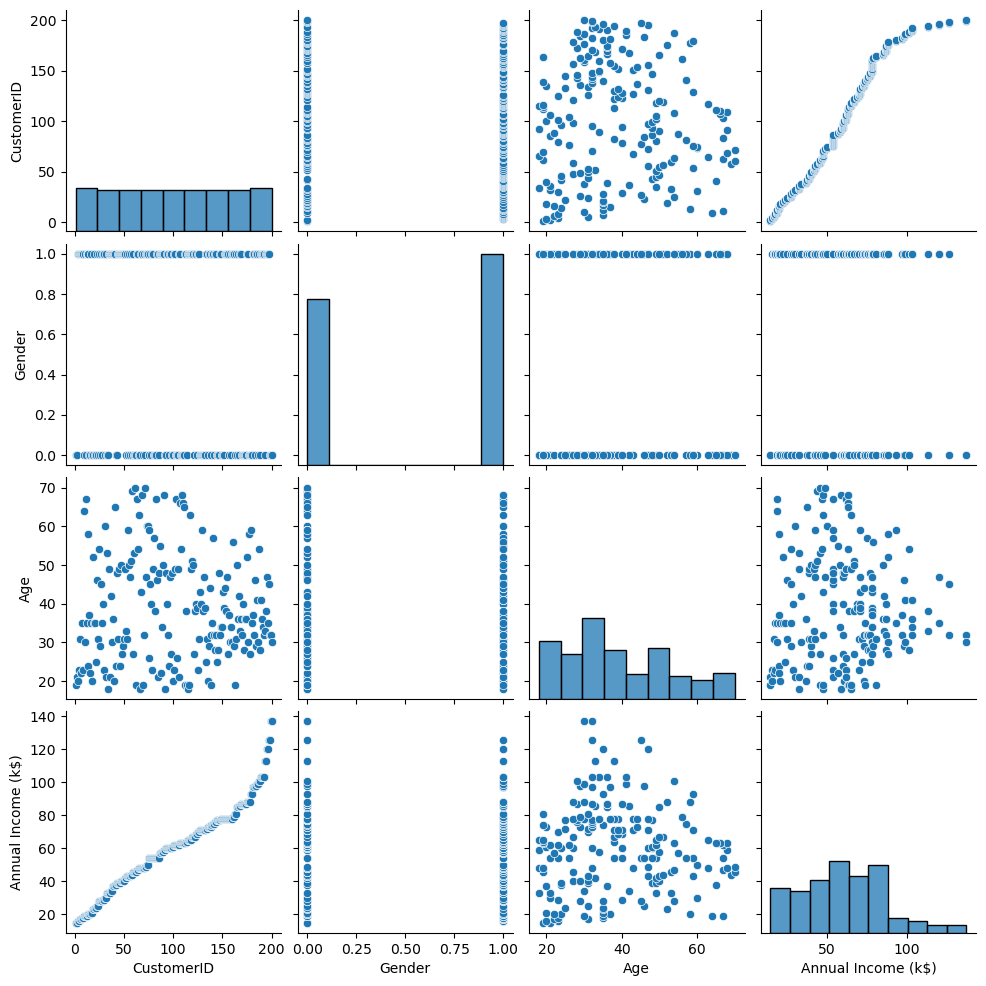

In [104]:
sns.pairplot(X)

In [107]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[842808.0599999999,
 254375.02790279032,
 138695.51832474925,
 95392.76089176611,
 74137.74561043929,
 63059.42027414788,
 54086.4678022935,
 45022.45619790542,
 38815.75146961385,
 35115.50914631346]

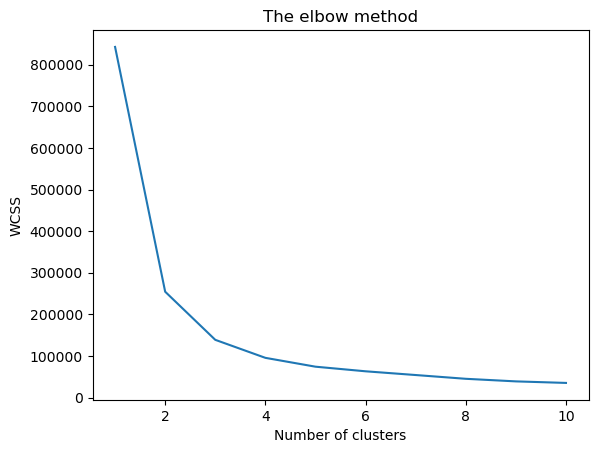

In [108]:

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [109]:
X = np.array(X)

# Implementing K Means Clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


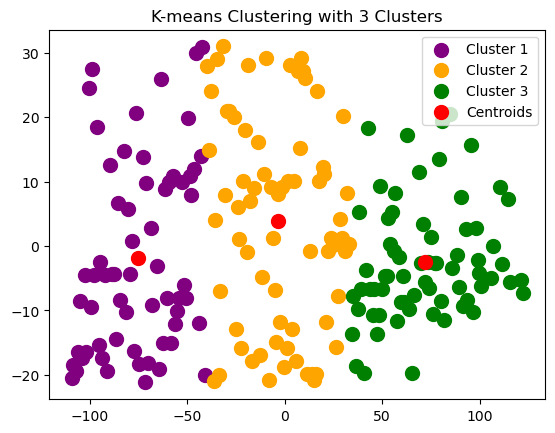

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_3 = kmeans.fit_predict(X)

plt.scatter(X_pca[y_kmeans_3 == 0, 0], X_pca[y_kmeans_3 == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_3 == 1, 0], X_pca[y_kmeans_3 == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_3 == 2, 0], X_pca[y_kmeans_3 == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with 3 Clusters')
plt.legend()
plt.show()


In [111]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, homogeneity_completeness_v_measure

davies_bouldin_kmeans = davies_bouldin_score(X, y_kmeans_3)

In [112]:
# Print metrics for K-means
print("Metrics for K-means for 3 clusters:")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans}")
print()

Metrics for K-means for 3 clusters:
Davies-Bouldin Index: 0.6626318945479001



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


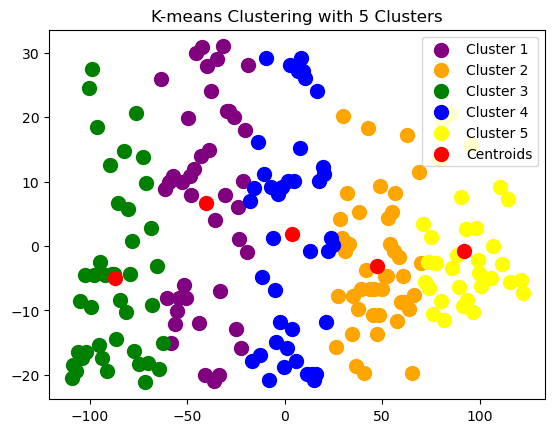

In [113]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_5 = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[y_kmeans_5 == 0, 0], X_pca[y_kmeans_5 == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_5 == 1, 0], X_pca[y_kmeans_5 == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_5 == 2, 0], X_pca[y_kmeans_5 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans_5 == 3, 0], X_pca[y_kmeans_5 == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_pca[y_kmeans_5 == 4, 0], X_pca[y_kmeans_5 == 4, 1], s=100, c='yellow', label='Cluster 5')

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with 5 Clusters')
plt.legend()
plt.show()


In [116]:
davies_bouldin_kmeans5 = davies_bouldin_score(X, y_kmeans_5)

In [117]:
print("Metrics for K-means for 5 clusters :")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans5}")


Metrics for K-means for 5 clusters :
Davies-Bouldin Index: 0.8015524947479726


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


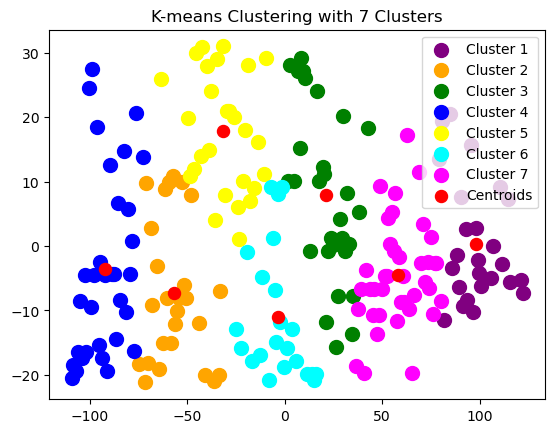

In [119]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_7 = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[y_kmeans_7 == 0, 0], X_pca[y_kmeans_7 == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_7 == 1, 0], X_pca[y_kmeans_7 == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_7 == 2, 0], X_pca[y_kmeans_7 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans_7 == 3, 0], X_pca[y_kmeans_7 == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_pca[y_kmeans_7 == 4, 0], X_pca[y_kmeans_7 == 4, 1], s=100, c='yellow', label='Cluster 5')
plt.scatter(X_pca[y_kmeans_7 == 5, 0], X_pca[y_kmeans_7 == 5, 1], s=100, c='cyan', label='Cluster 6')
plt.scatter(X_pca[y_kmeans_7 == 6, 0], X_pca[y_kmeans_7 == 6, 1], s=100, c='magenta', label='Cluster 7')

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='.', label='Centroids')

plt.title('K-means Clustering with 7 Clusters')
plt.legend()
plt.show()

In [120]:
davies_bouldin_kmeans = davies_bouldin_score(X, y_kmeans_7)

In [121]:
print("Metrics for K-means for 7 clusters:")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans}")

Metrics for K-means for 7 clusters:
Davies-Bouldin Index: 0.8331419695296726


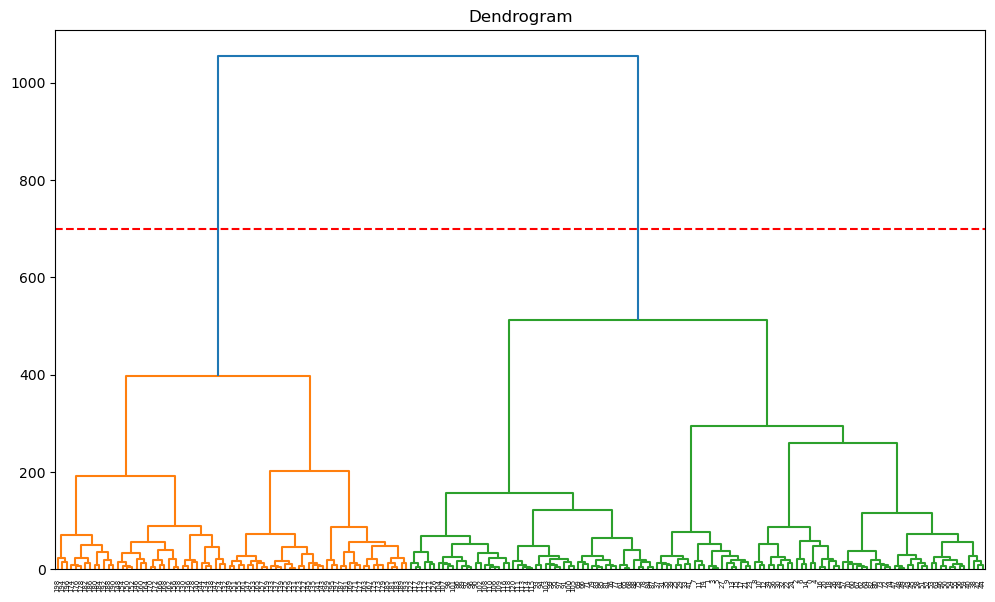

In [127]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

# Plotting a horizontal line at y = 700
plt.axhline(y=700, color='r', linestyle='--')
plt.show()


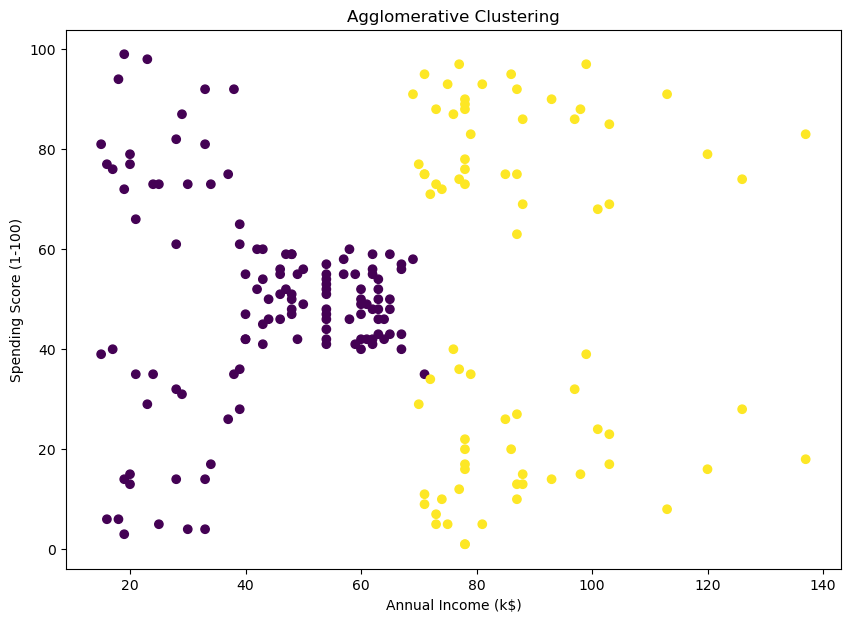

In [125]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(df)

plt.figure(figsize=(10, 7))  
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster_labels) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show()

In [126]:
davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.7848307942899339


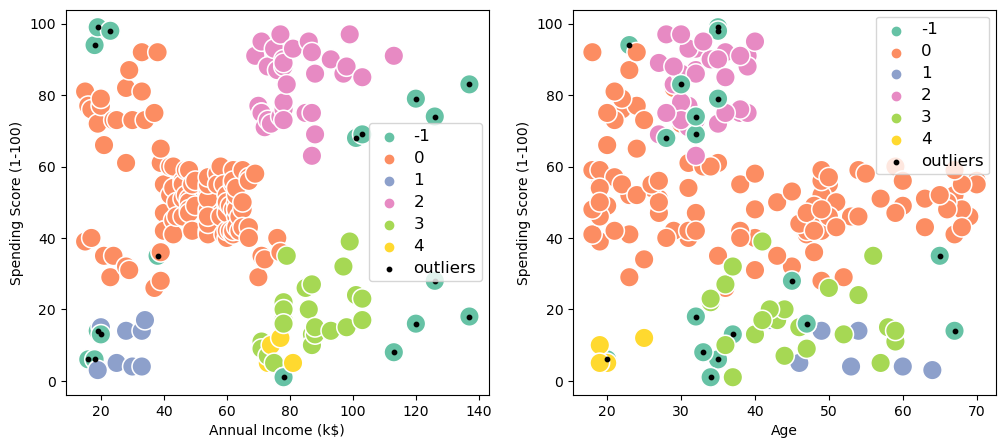

In [133]:
from sklearn.cluster import DBSCAN

X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

DBSCAN_dataset.Cluster.value_counts().to_frame()

outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset,  # Pass the entire DataFrame here
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset,  # Pass the entire DataFrame here
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()